Customer Service Requests Analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [12]:
# reading csvfile
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

In [13]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


In [14]:
# checking first 5rows
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [15]:
# checking last 5rows
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
364557,29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


In [16]:
# finding no.of rows and cols
df.shape

(364558, 53)

In [17]:
# about dataframe
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [18]:
# checking sum of null values in each cols
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [19]:
# removing null cols
df_col = df.drop(["School or Citywide Complaint" ,"Vehicle Type" ,"Taxi Company Borough" ,"Taxi Pick Up Location" ,"Bridge Highway Name" ,
         "Bridge Highway Direction" ,"Road Ramp" ,"Bridge Highway Segment" ,"Garage Lot Name" ,"Ferry Direction" ,"Ferry Terminal Name" ,
         "Intersection Street 1" ,"Intersection Street 2" ,"Landmark"],axis=1)

In [20]:
df_col.shape

(364558, 39)

In [21]:
# removing null rows
df_row = df_col.dropna()

In [22]:
df_row.isna().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number               

In [23]:
df_row.shape

(300932, 39)

In [24]:
# findin datatypes of each cols
df_row.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Address Type                       object
City                               object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                    object
Borough                            object
X Coordinate (State Plane)        float64
Y Coordinate (State Plane)        

In [25]:
df_row["Created Date"]

0         12/31/2015 11:59:45 PM
1         12/31/2015 11:59:44 PM
2         12/31/2015 11:59:29 PM
3         12/31/2015 11:57:46 PM
4         12/31/2015 11:56:58 PM
                   ...          
364553    01/01/2015 12:04:44 AM
364554    01/01/2015 12:04:28 AM
364555    01/01/2015 12:01:30 AM
364556    01/01/2015 12:01:29 AM
364557    01/01/2015 12:00:50 AM
Name: Created Date, Length: 300932, dtype: object

In [26]:
# coverting object to datetime cols
df_row[["Created Date", "Closed Date"]] = df_row[["Created Date", "Closed Date"]].apply(pd.to_datetime)

In [27]:
df_row.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Address Type                              object
City                                      object
Facility Type                             object
Status                                    object
Due Date                                  object
Resolution Description                    object
Resolution Action Updated Date            object
Community Board     

In [28]:
df_row[["Created Date", "Closed Date"]]

,Created Date,Closed Date
0,2015-12-31 23:59:45,2016-01-01 00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:57
2,2015-12-31 23:59:29,2016-01-01 04:51:03
3,2015-12-31 23:57:46,2016-01-01 07:43:13
4,2015-12-31 23:56:58,2016-01-01 03:24:42
...,...,...
364553,2015-01-01 00:04:44,2015-01-01 10:22:31
364554,2015-01-01 00:04:28,2015-01-01 02:25:02
364555,2015-01-01 00:01:30,2015-01-01 00:20:33
364556,2015-01-01 00:01:29,2015-01-01 02:42:22


<AxesSubplot:>

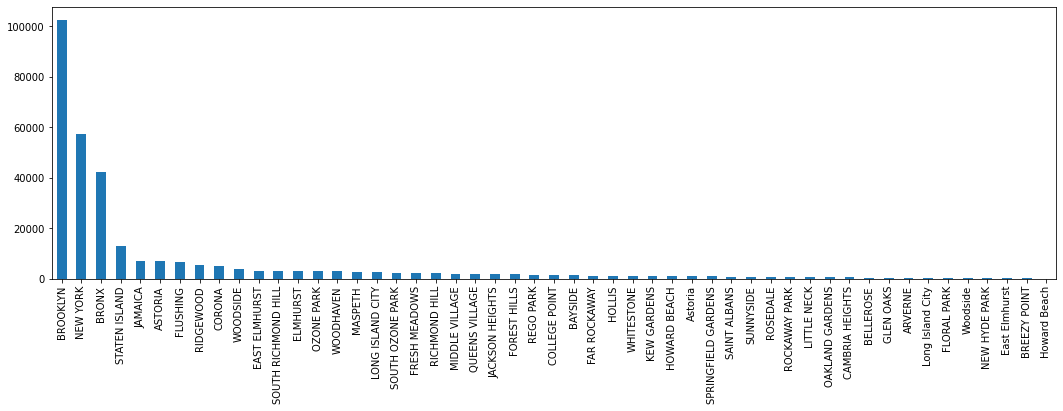

In [29]:
# frequency plot for city wise
df_row['City'].value_counts().plot.bar(figsize=(18 , 5))

In [58]:
df_sc = df_row[["City", "Complaint Type"]]

In [59]:
df_scplt = df_sc[(df_sc["City"]=="BROOKLYN")]

In [60]:
df_scplt

,City,Complaint Type
5,BROOKLYN,Illegal Parking
9,BROOKLYN,Blocked Driveway
13,BROOKLYN,Illegal Parking
17,BROOKLYN,Noise - Commercial
18,BROOKLYN,Noise - Commercial
...,...,...
364539,BROOKLYN,Blocked Driveway
364541,BROOKLYN,Blocked Driveway
364544,BROOKLYN,Noise - Commercial
364545,BROOKLYN,Blocked Driveway


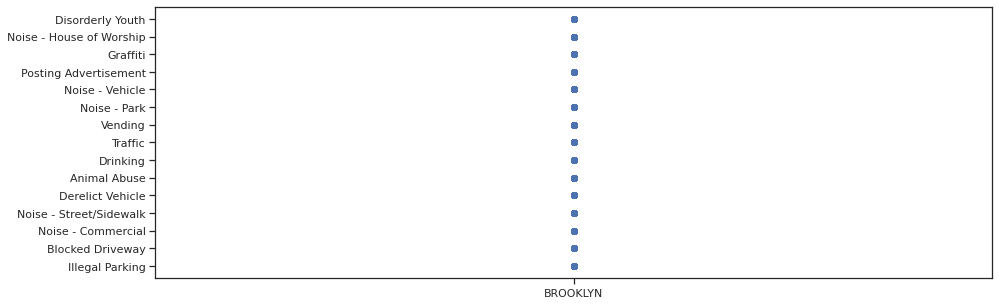

In [61]:
#Scatter Plot for City vs Complaint Type
x = df_scplt['City']
y = df_scplt['Complaint Type']

plt.figure(figsize=(15, 5))
plt.scatter(x, y)

In [62]:
df_scplt['Complaint Type'].unique()

array(['Illegal Parking', 'Blocked Driveway', 'Noise - Commercial',
       'Noise - Street/Sidewalk', 'Derelict Vehicle', 'Animal Abuse',
       'Drinking', 'Traffic', 'Vending', 'Noise - Park',
       'Noise - Vehicle', 'Posting Advertisement', 'Graffiti',
       'Noise - House of Worship', 'Disorderly Youth'], dtype=object)

In [65]:
#Replacing String to Numeric for Column City and Complaimt Type
df_scplt['City'].replace(['BROOKLYN'],
                        [0], inplace=True)
df_scplt['Complaint Type'].replace(['Illegal Parking', 'Blocked Driveway', 'Noise - Commercial','Noise - Street/Sidewalk', 'Derelict Vehicle', 'Animal Abuse',
       'Drinking', 'Traffic', 'Vending', 'Noise - Park',
       'Noise - Vehicle', 'Posting Advertisement', 'Graffiti',
       'Noise - House of Worship', 'Disorderly Youth'],
                        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)

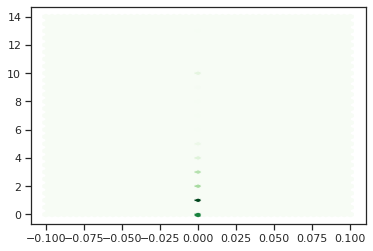

In [67]:
#Hexbin plot for City 
x = df_scplt['City']
y = df_scplt['Complaint Type']

# sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")
plt.hexbin(x, y, gridsize = 50, cmap ='Greens')

<AxesSubplot:>

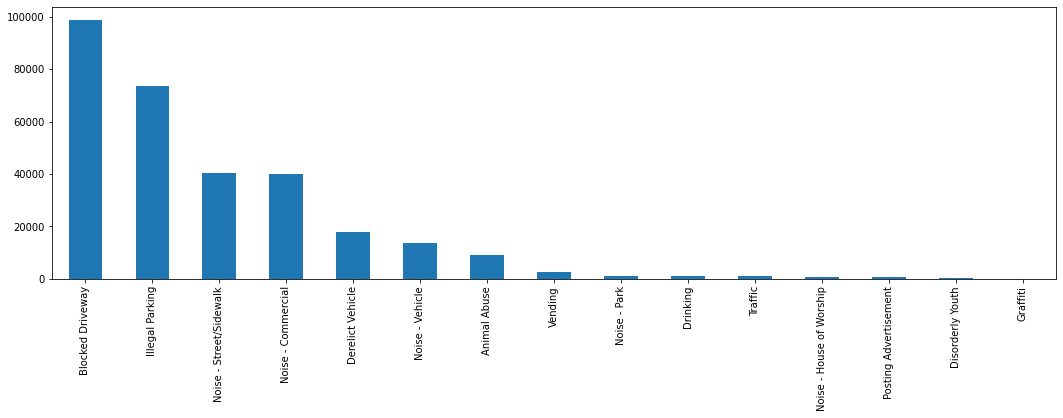

In [34]:
#Bar plot for count vs Complaint Type
df_sc['Complaint Type'].value_counts().plot.bar(figsize=(18 , 5))

In [35]:
#Groupby the Complaint Type and Count the types
df_sc['Complaint Count'] = df_sc.groupby('Complaint Type')['Complaint Type'].transform('count')

In [36]:
df_sc

,City,Complaint Type,Complaint Count
0,NEW YORK,Noise - Street/Sidewalk,40444
1,ASTORIA,Blocked Driveway,98668
2,BRONX,Blocked Driveway,98668
3,BRONX,Illegal Parking,73719
4,ELMHURST,Illegal Parking,73719
...,...,...,...
364553,WOODHAVEN,Illegal Parking,73719
364554,BRONX,Noise - Vehicle,13763
364555,NEW YORK,Noise - Street/Sidewalk,40444
364556,BRONX,Blocked Driveway,98668


In [37]:
df_com = df_sc[["Complaint Type" , "Complaint Count"]]

In [38]:
df_com

,Complaint Type,Complaint Count
0,Noise - Street/Sidewalk,40444
1,Blocked Driveway,98668
2,Blocked Driveway,98668
3,Illegal Parking,73719
4,Illegal Parking,73719
...,...,...
364553,Illegal Parking,73719
364554,Noise - Vehicle,13763
364555,Noise - Street/Sidewalk,40444
364556,Blocked Driveway,98668


In [39]:
#Droping the duplicates from Complaint Type
df_com_uniq = df_com.drop_duplicates()

In [40]:
df_com_uniq

,Complaint Type,Complaint Count
0,Noise - Street/Sidewalk,40444
1,Blocked Driveway,98668
3,Illegal Parking,73719
14,Derelict Vehicle,17706
17,Noise - Commercial,39919
26,Noise - House of Worship,803
39,Posting Advertisement,645
89,Animal Abuse,8968
98,Vending,2451
156,Noise - Vehicle,13763


In [41]:
#Finding Top 10 number in Complaint 
df_com_uniq.nlargest(10,'Complaint Count')

,Complaint Type,Complaint Count
1,Blocked Driveway,98668
3,Illegal Parking,73719
0,Noise - Street/Sidewalk,40444
17,Noise - Commercial,39919
14,Derelict Vehicle,17706
156,Noise - Vehicle,13763
89,Animal Abuse,8968
98,Vending,2451
593,Noise - Park,1289
180,Drinking,1124


In [42]:
df_list = df_sc["City"].tolist()

In [43]:
df_list = list(set(df_list))

In [44]:
df_list

['HOWARD BEACH',
 'EAST ELMHURST',
 'ELMHURST',
 'QUEENS VILLAGE',
 'RIDGEWOOD',
 'FAR ROCKAWAY',
 'COLLEGE POINT',
 'OAKLAND GARDENS',
 'FOREST HILLS',
 'WHITESTONE',
 'GLEN OAKS',
 'FLORAL PARK',
 'KEW GARDENS',
 'STATEN ISLAND',
 'FRESH MEADOWS',
 'East Elmhurst',
 'FLUSHING',
 'BREEZY POINT',
 'SOUTH RICHMOND HILL',
 'WOODSIDE',
 'Astoria',
 'SAINT ALBANS',
 'ROSEDALE',
 'CAMBRIA HEIGHTS',
 'NEW YORK',
 'MASPETH',
 'NEW HYDE PARK',
 'RICHMOND HILL',
 'Howard Beach',
 'SPRINGFIELD GARDENS',
 'CORONA',
 'REGO PARK',
 'OZONE PARK',
 'ROCKAWAY PARK',
 'MIDDLE VILLAGE',
 'JACKSON HEIGHTS',
 'ASTORIA',
 'SUNNYSIDE',
 'SOUTH OZONE PARK',
 'BAYSIDE',
 'Woodside',
 'JAMAICA',
 'BELLEROSE',
 'BRONX',
 'HOLLIS',
 'BROOKLYN',
 'LONG ISLAND CITY',
 'ARVERNE',
 'WOODHAVEN',
 'Long Island City',
 'LITTLE NECK']

In [45]:
df_city_com = df_row[["City", "Complaint Type"]]

In [69]:
#loop for City and Complaint type
for i in df_list:
    df_sub = df_city_com[(df_city_com["City"]==i)]
    #print(df_sub)

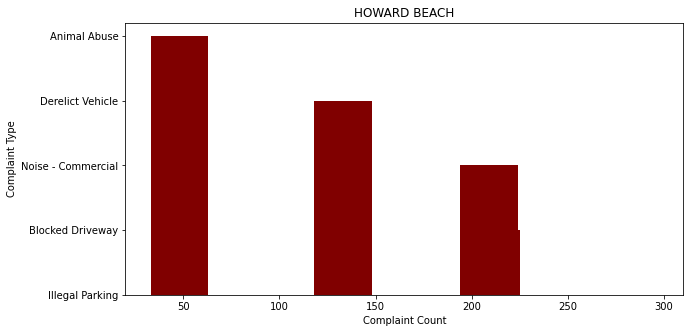

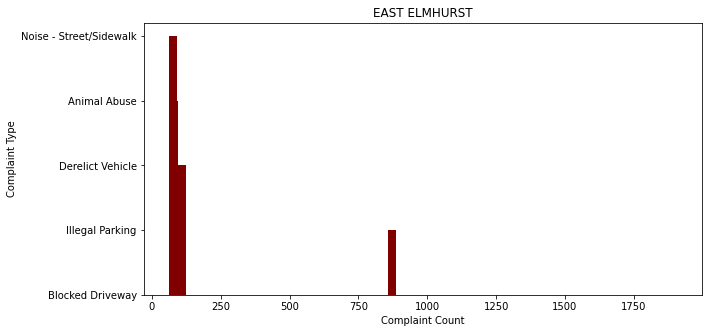

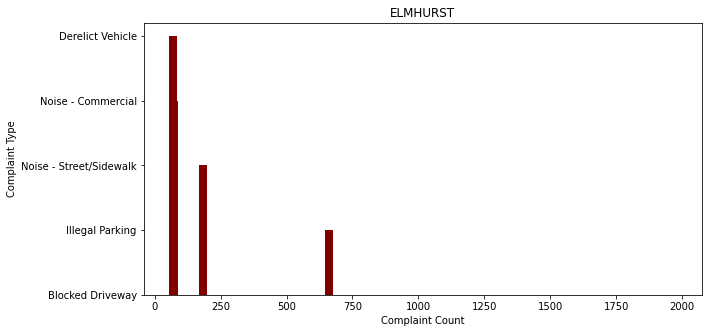

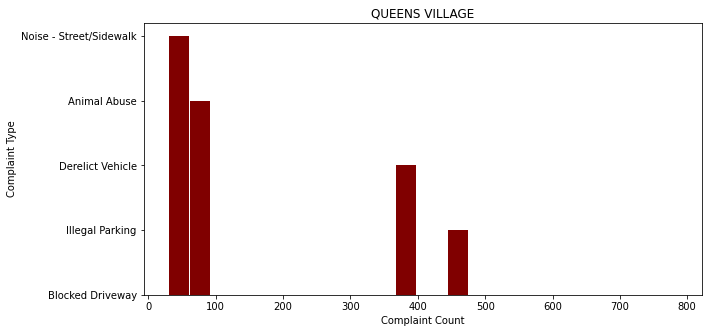

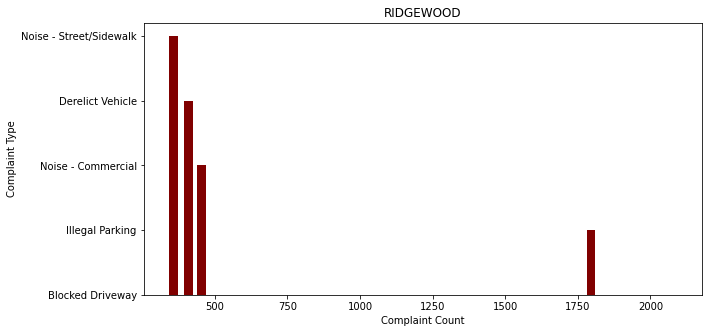

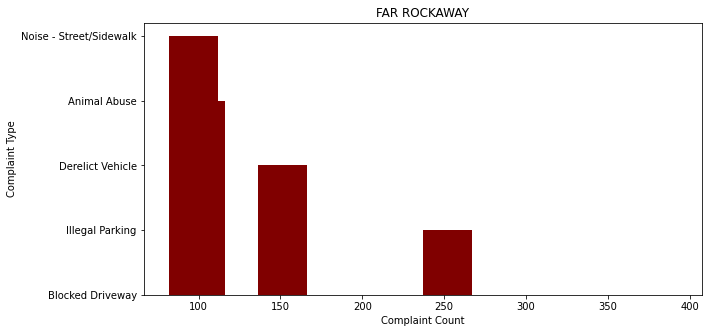

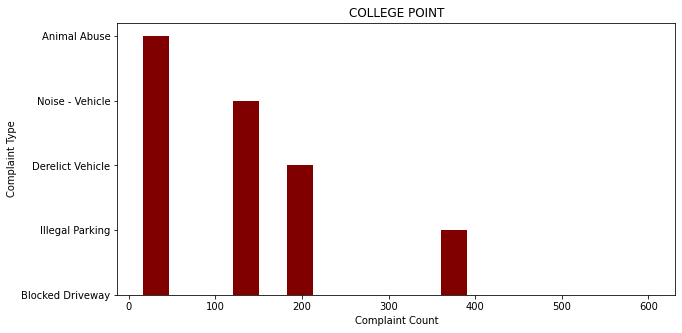

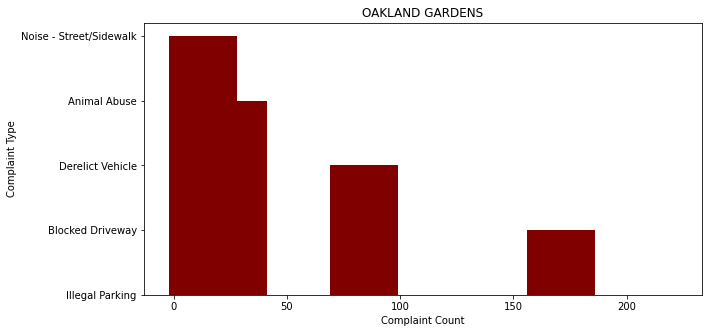

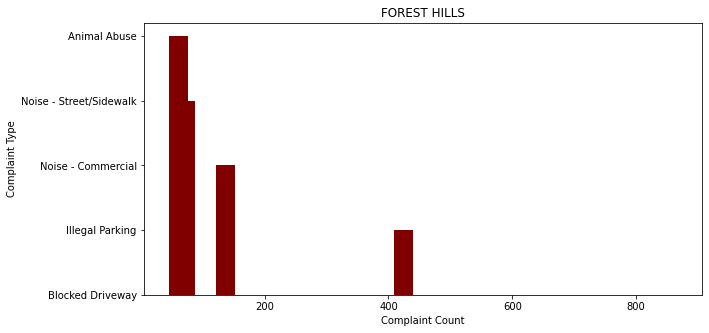

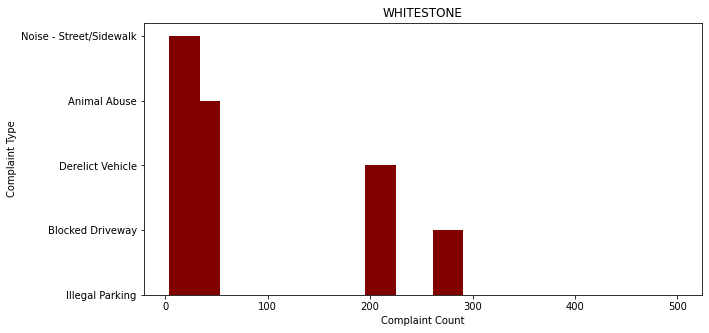

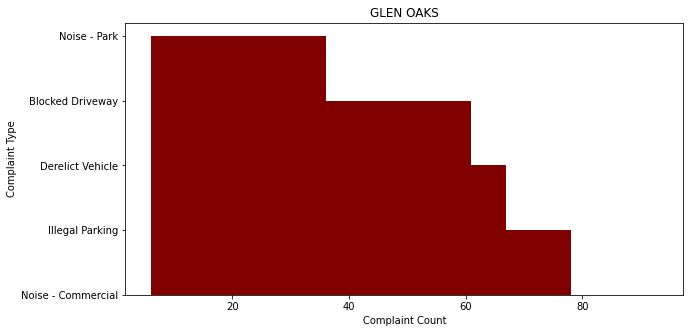

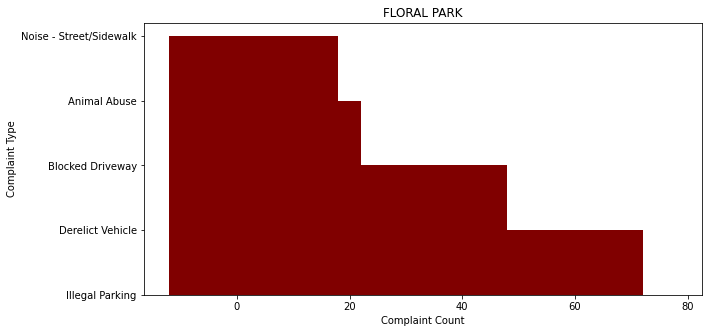

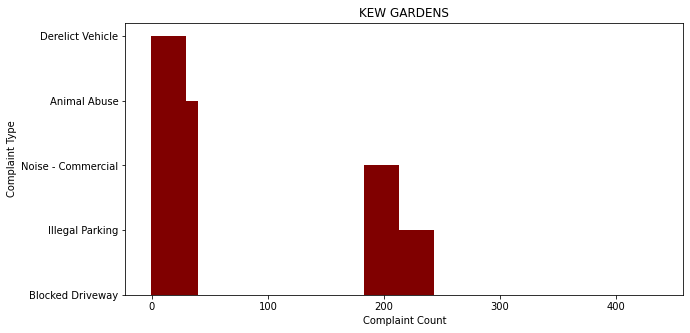

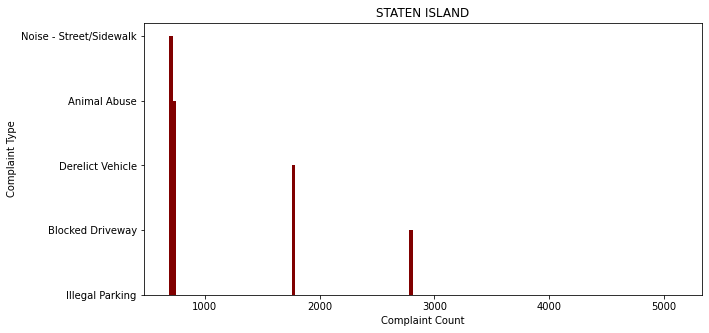

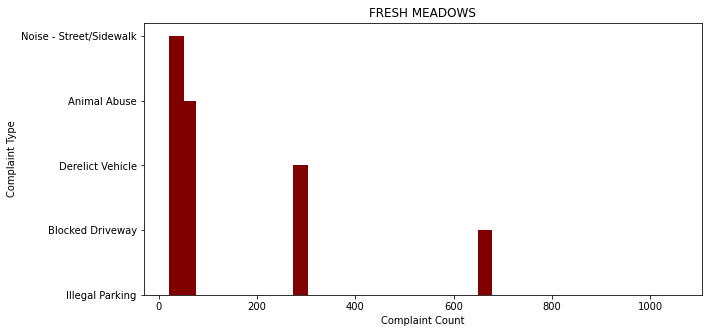

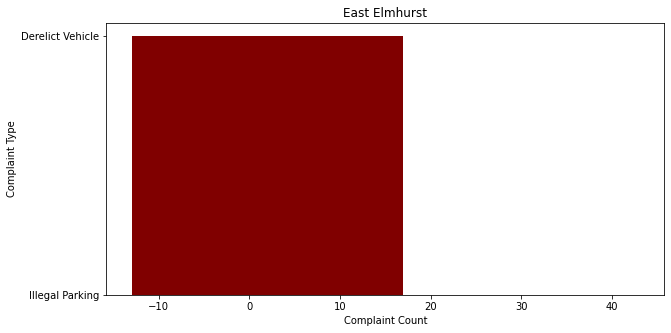

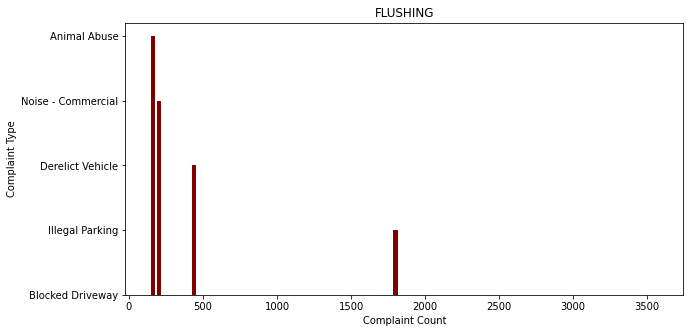

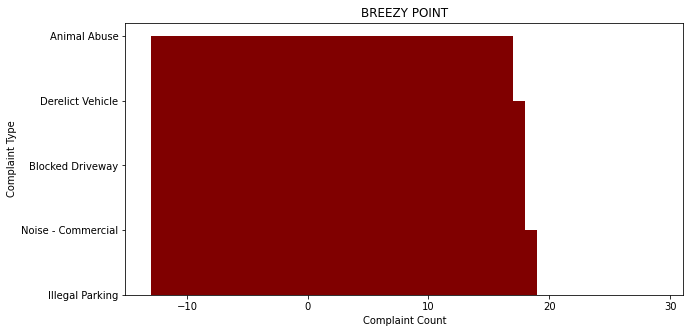

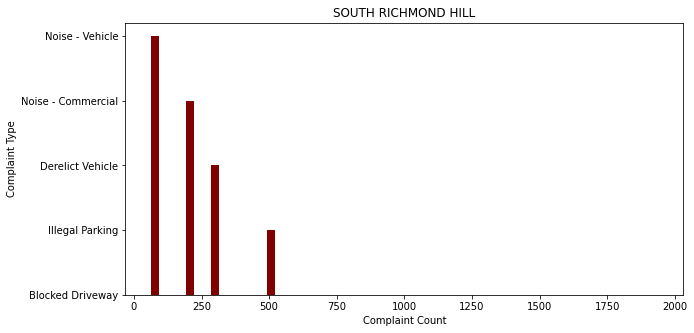

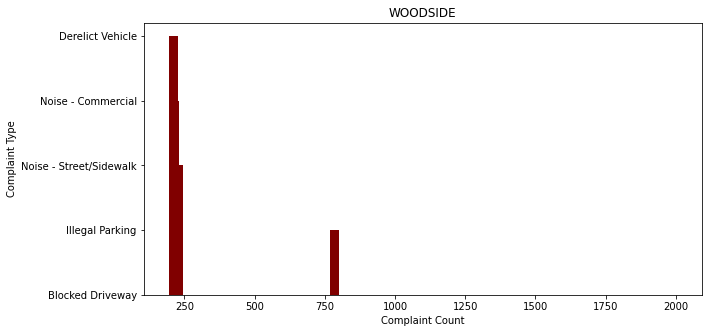

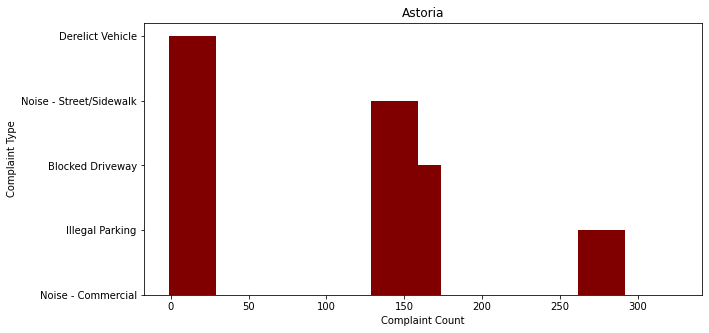

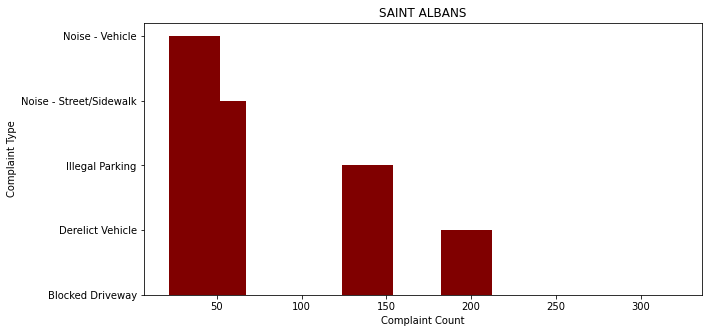

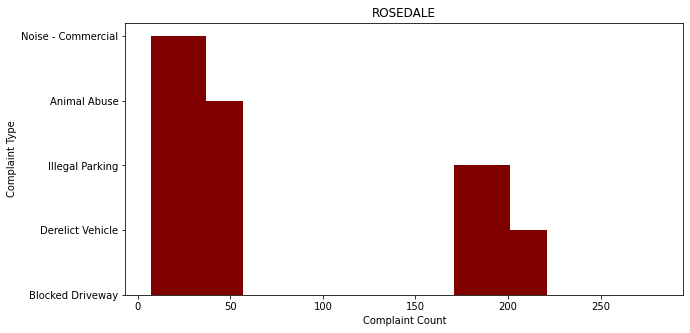

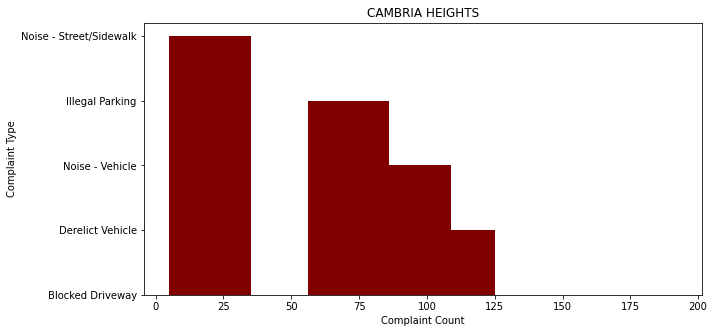

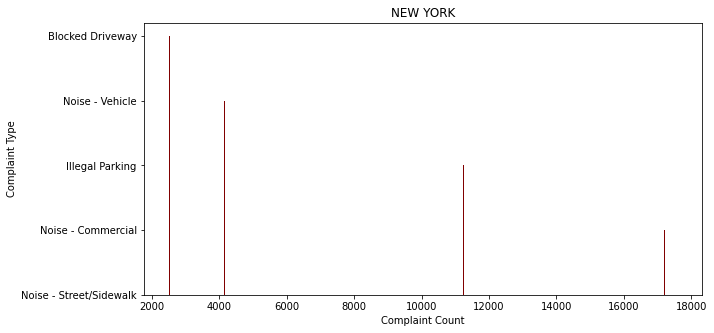

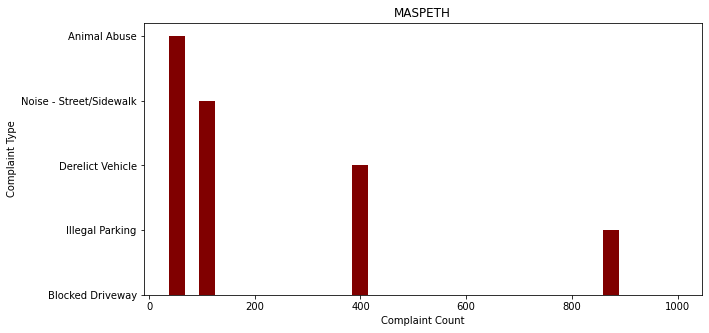

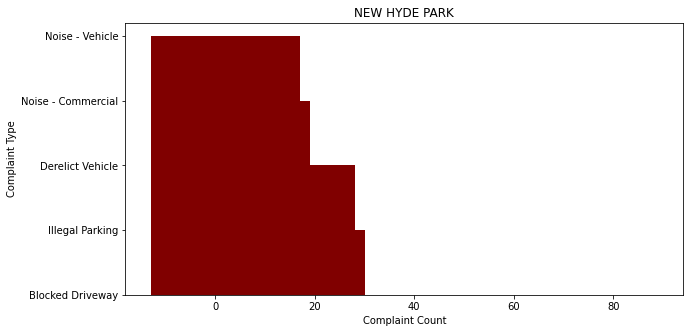

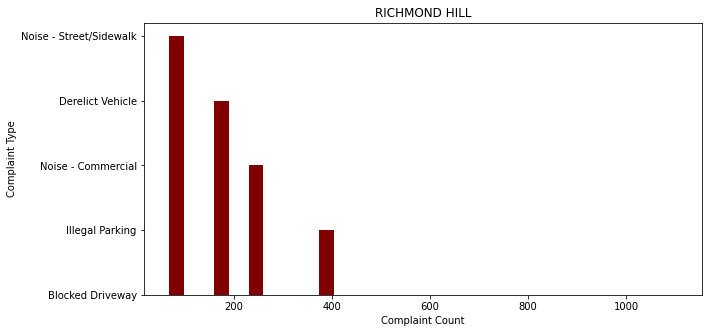

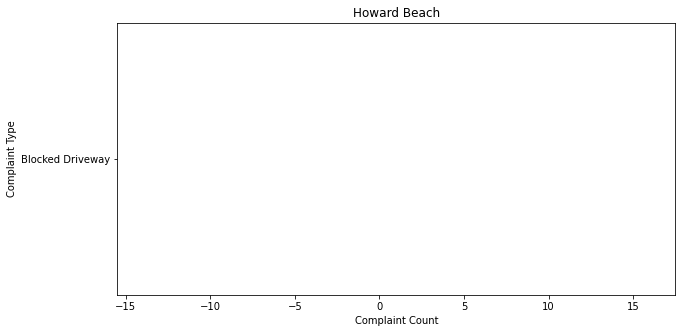

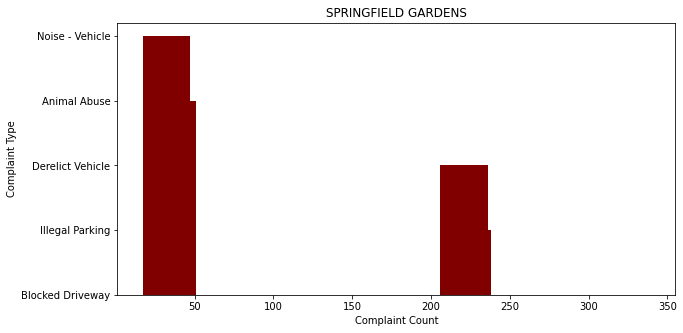

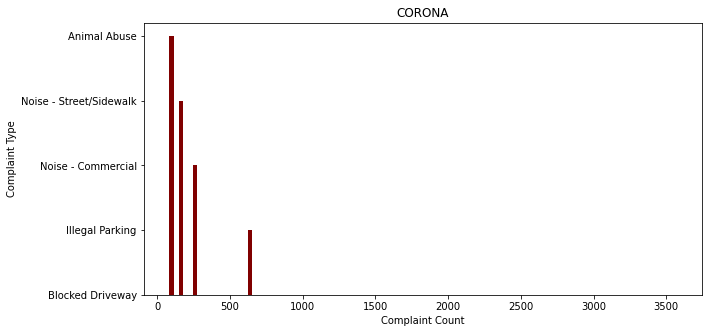

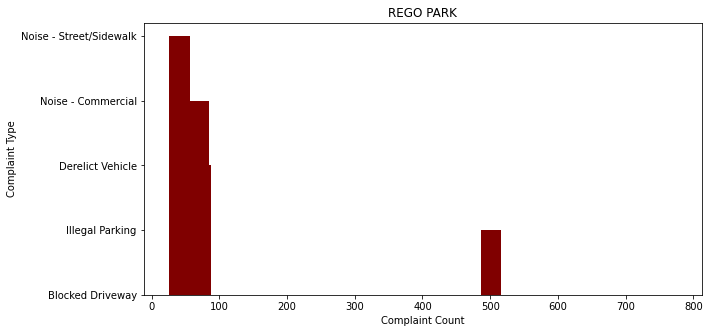

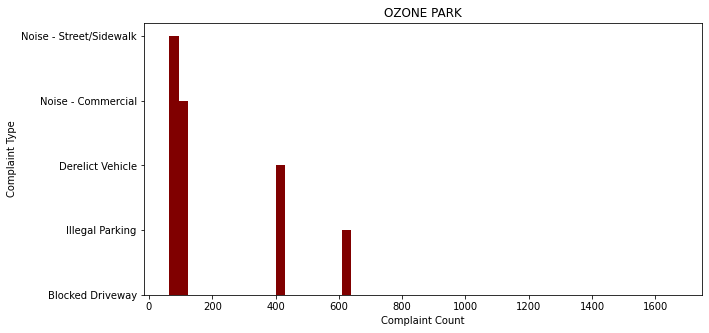

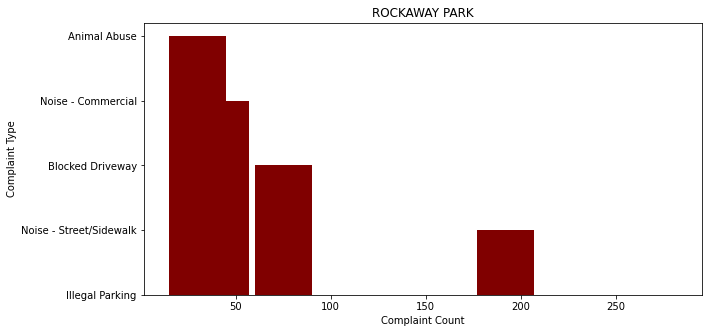

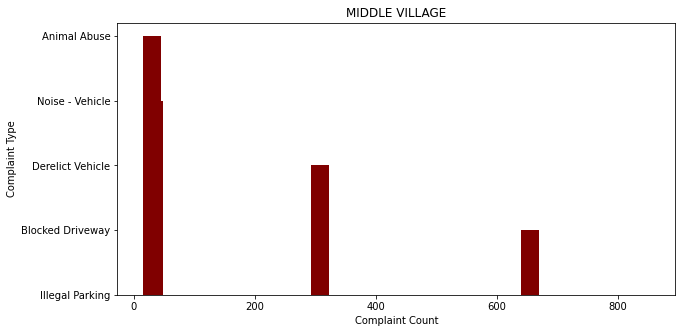

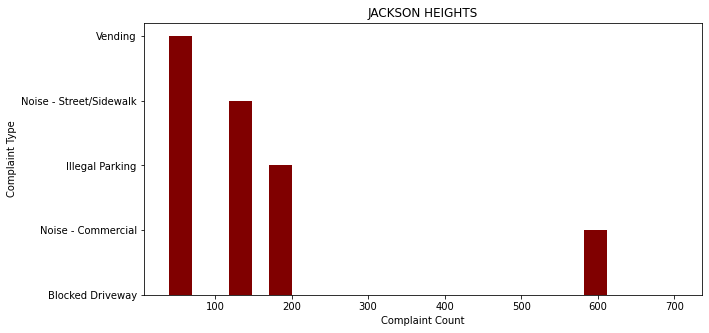

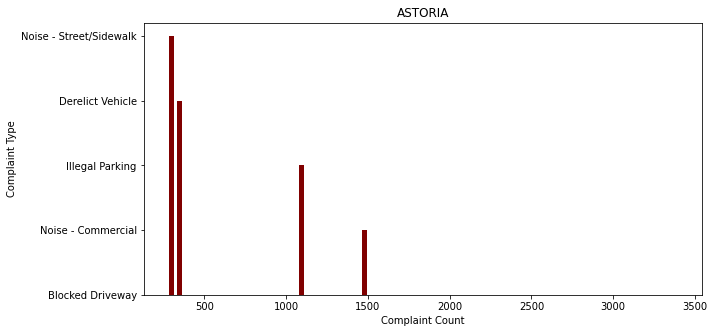

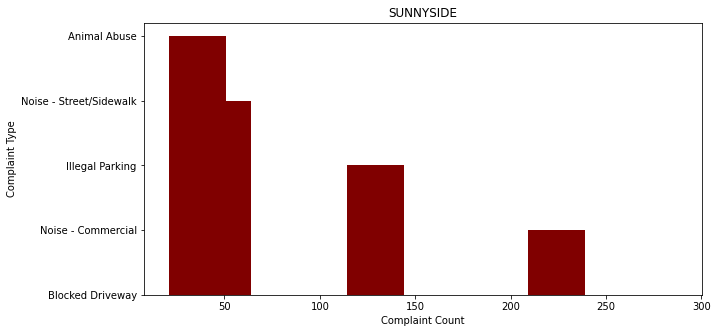

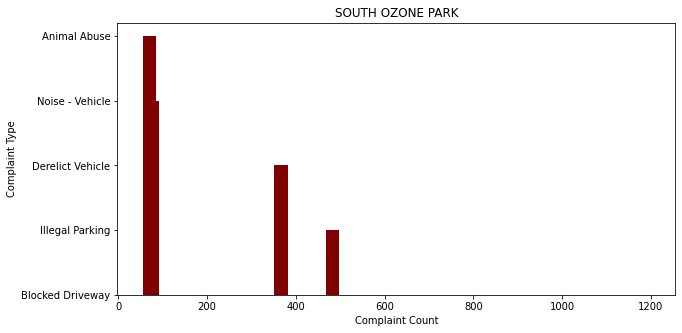

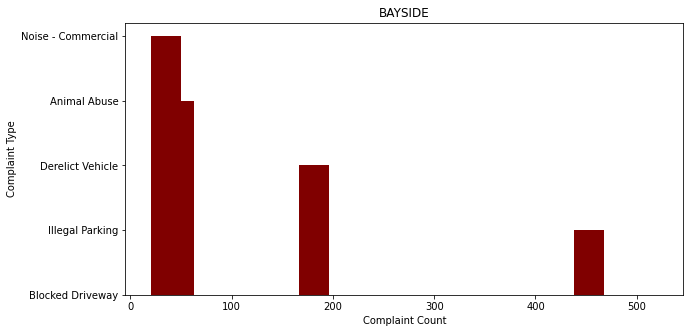

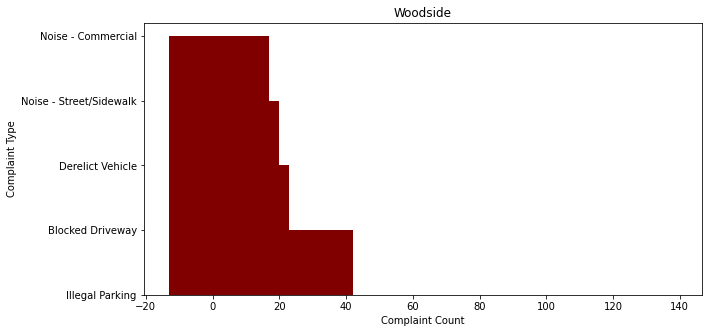

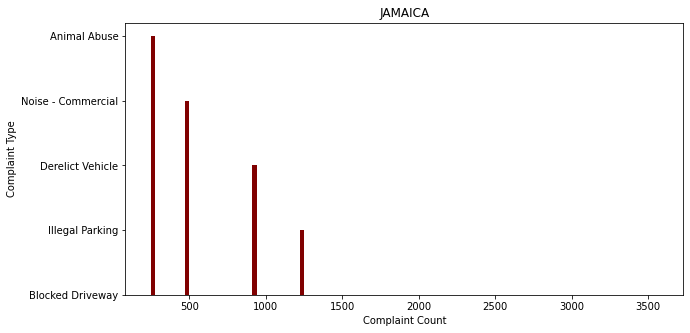

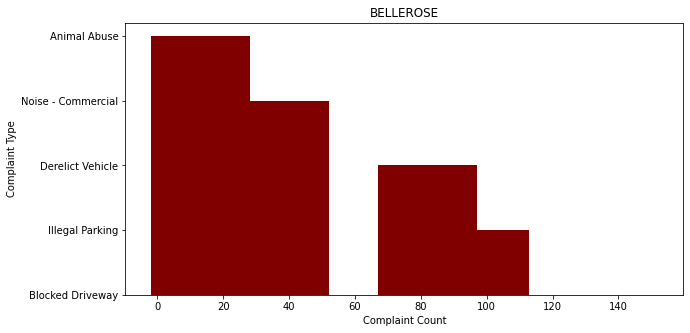

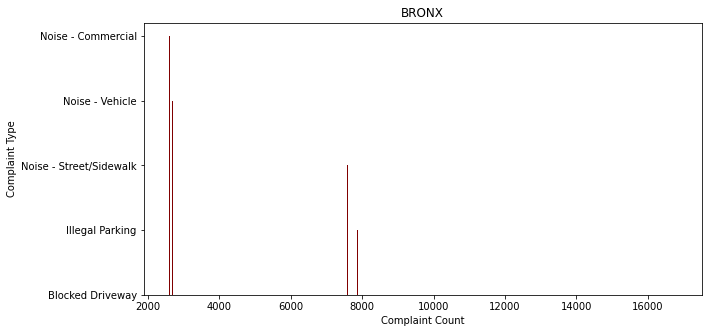

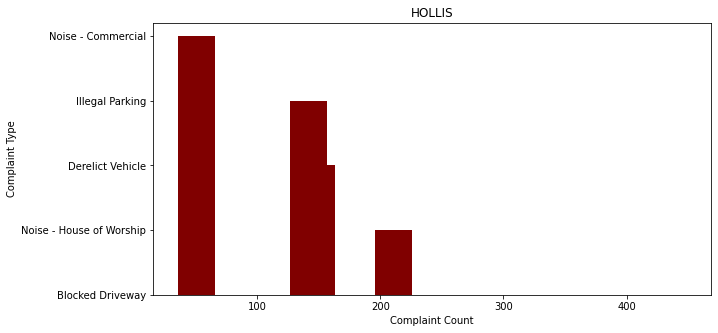

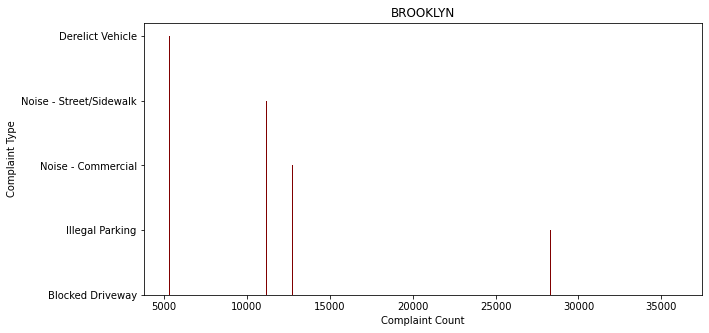

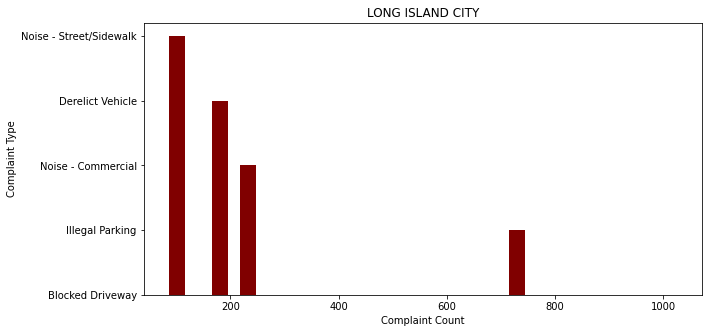

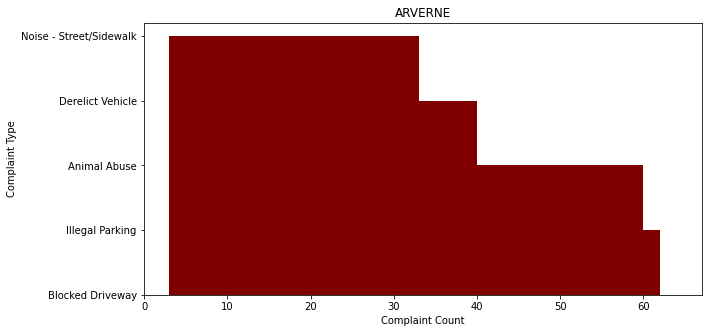

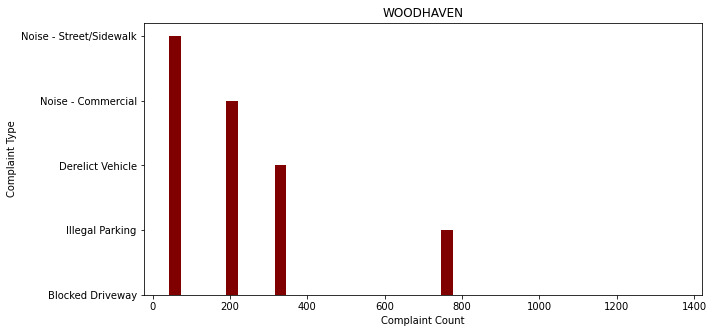

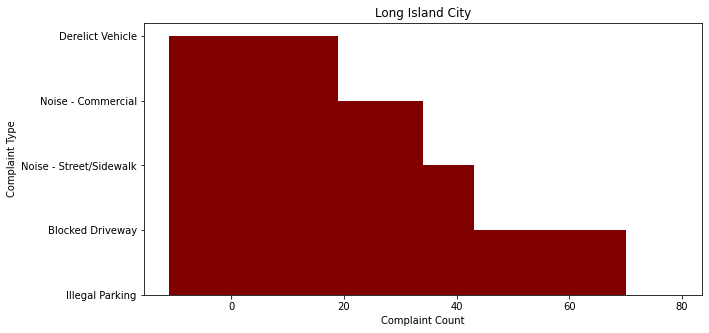

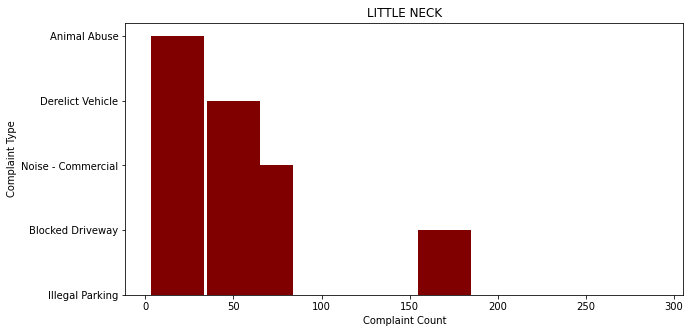

In [47]:
for i in df_list:
    df_sub = df_city_com[(df_city_com["City"]==i)]
    df_sub['Complaint Count'] = df_sub.groupby('Complaint Type')['Complaint Type'].transform('count')
    df_sub_com = df_sub.drop_duplicates()
    df_sub_max = df_sub_com.nlargest(5,'Complaint Count')
    x = df_sub_max['Complaint Count']
    y = df_sub_max['Complaint Type']
    fig = plt.figure(figsize = (10, 5))
    # creating the bar plot
    plt.bar(x, y, color ='maroon',
            width = 30)
    plt.xlabel("Complaint Count")
    plt.ylabel("Complaint Type")
    plt.title(i)
    plt.show()

In [48]:
df_sc = df_row[["Complaint Type" ,"Created Date" , "Closed Date"]]

In [50]:
df_list_com = df_sc["Complaint Type"].tolist()

In [51]:
df_list_com = list(set(df_list_com))

In [53]:
#loop for Complaint Type Created date vs Closed date
for k in df_list_com:
    df_sub = df_sc[(df_sc["Complaint Type"]==k)]
    difference = df_sc["Closed Date"]-df_sc["Created Date"]
    diff = difference.mean()
    print("The Average Of", k,diff)
    

The Average Of Blocked Driveway 0 days 04:13:23.418968404
The Average Of Derelict Vehicle 0 days 04:13:23.418968404
The Average Of Noise - Commercial 0 days 04:13:23.418968404
The Average Of Traffic 0 days 04:13:23.418968404
The Average Of Drinking 0 days 04:13:23.418968404
The Average Of Noise - Park 0 days 04:13:23.418968404
The Average Of Graffiti 0 days 04:13:23.418968404
The Average Of Disorderly Youth 0 days 04:13:23.418968404
The Average Of Posting Advertisement 0 days 04:13:23.418968404
The Average Of Noise - House of Worship 0 days 04:13:23.418968404
The Average Of Vending 0 days 04:13:23.418968404
The Average Of Noise - Vehicle 0 days 04:13:23.418968404
The Average Of Animal Abuse 0 days 04:13:23.418968404
The Average Of Illegal Parking 0 days 04:13:23.418968404
The Average Of Noise - Street/Sidewalk 0 days 04:13:23.418968404
